In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print("torch version:" + torch.__version__)

torch version:1.8.0+cu101


In [3]:
#读取文件
data_df = pd.read_csv("train.csv")
print("shape is {}".format(data_df.shape))

shape is (8693, 14)


In [4]:
#观察数据
data_df.head(50)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
data_df.describe()#统计数值数据

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
data_df.info()#统计缺失数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


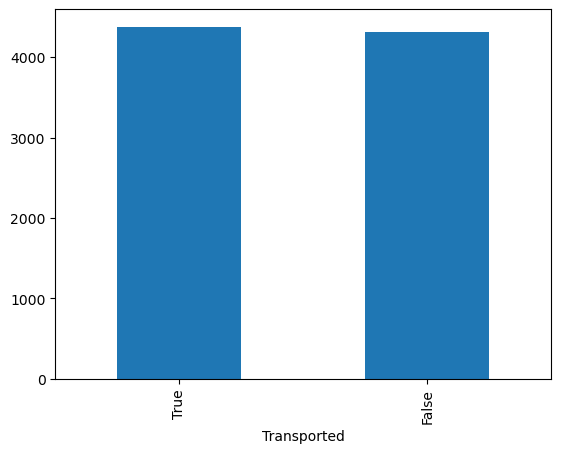

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64
0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64


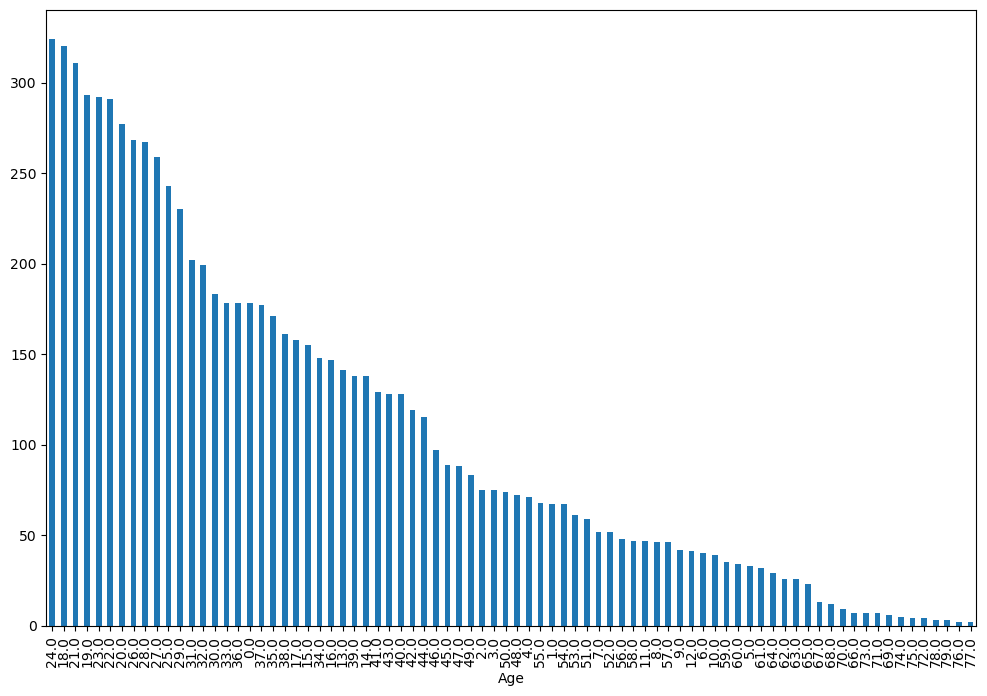

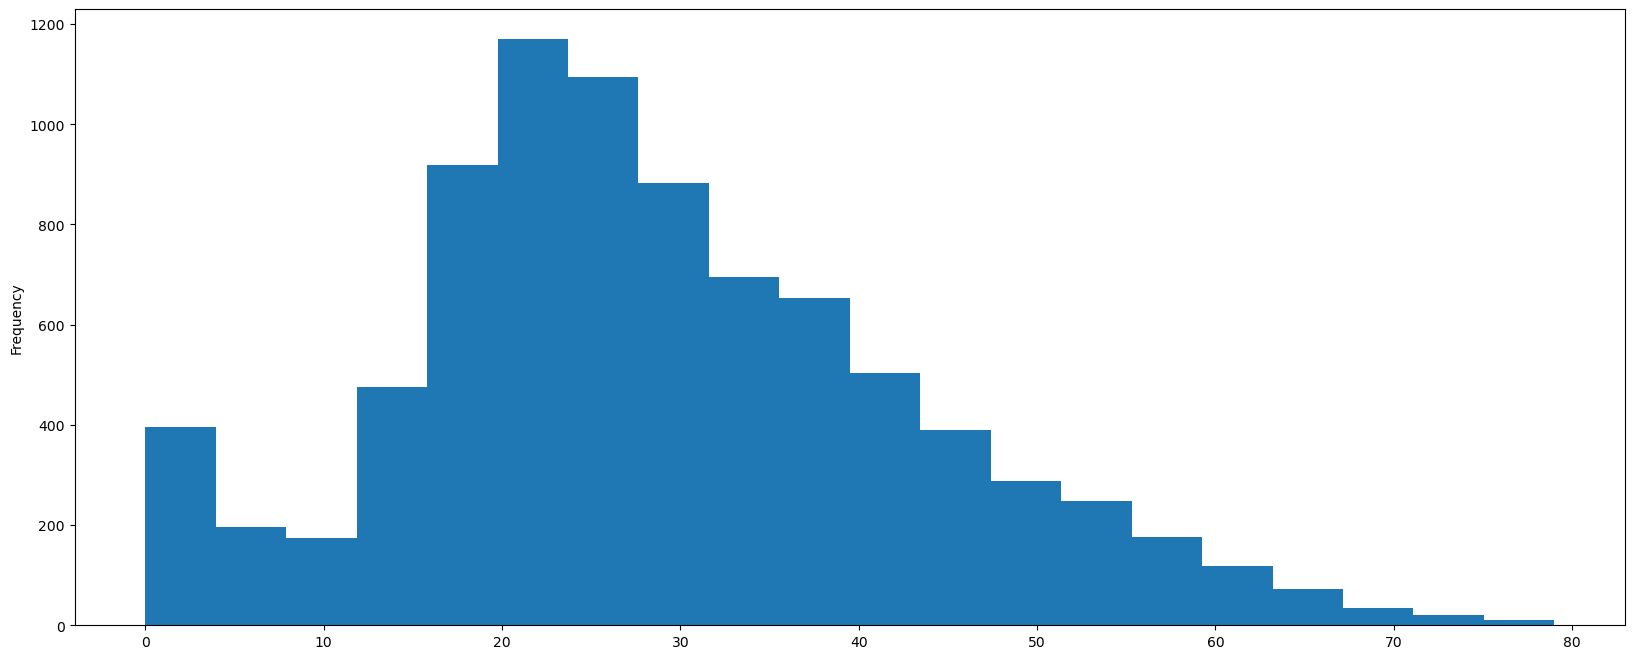

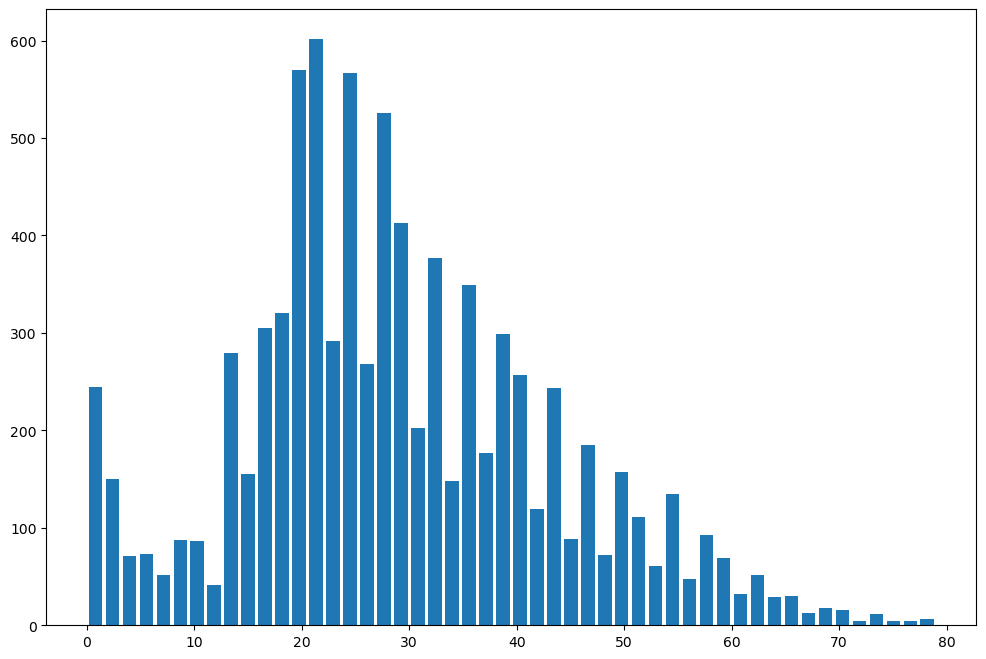

In [7]:

import matplotlib.pyplot as plt

plot_df = data_df.Transported.value_counts()
plot_df.plot(kind="bar")
plt.show()  # 这将确保第一个图形立即显示
#这里plot_df还是dataframe数据，直接plot调用的是pandas自带的绘图。使用plt.hist等，调用的matplotlib的绘图，
#跟pandas形式差不多，但有些细节处理更好，比如，在直方图旁边可以加空隙等等
#seaborn的图是最好看的，需要额外调用这个库。

print(data_df.Age.value_counts())
print(data_df.Age)
#从打印信息可以看出，value_counts()是统计个数，是按照统计的数目大小排序的。虽然他俩都是pandas的series

plot_df_age = data_df.Age.value_counts()
plot_df_age.plot(kind="bar",figsize = (12,8))
plt.show()  # 这将确保第二个图形也被显示
#用条形图显示统计后的数据，不适合有很多数据的情况，因为会导致太多行。

plot_age = data_df.Age
plot_age.plot(kind="hist",bins = 20, figsize = (20,8))
plt.show()  # 这将确保第二个图形也被显示
#如果直接用直方图显示基础数据，pandas的绘图中间不能加空格，导致比较难看。其中bins是直方图的条的个数。

plt.figure(figsize=(12,8))
plt.hist(plot_age, bins=50, rwidth=0.8)
plt.show()
#用mat显示基本还行，rwidth是条形的宽度，小于一时有空格


In [8]:
def showalldis():
    fig, ax = plt.subplots(5,1,  figsize=(10, 10))#5,1是5个子图，一共五行
    #ax是一个数组，五个子图。
    #fig: 这是整个图形的对象，可以被视为一个容器，它包含了所有的子图（axes），以及可能的图形装饰，如标题、图例等。
    #你可以使用 fig 来保存图形到文件、调整图形的全局属性等。
    #ax: 这是子图对象的数组。在这个例子中，由于你创建了5个子图，ax 将是一个长度为5的数组，每个元素都是一个 AxesSubplot 对象，
    #代表其中一个子图。你可以通过这些 AxesSubplot 对象来绘制数据、设置标题、坐标轴标签等。
    plt.subplots_adjust(top = 2)#top设置高度

    sns.histplot(data_df['Age'], color='b', bins=50, ax=ax[0]);
    sns.histplot(data_df['FoodCourt'], color='b', bins=50, ax=ax[1]);
    sns.histplot(data_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
    sns.histplot(data_df['Spa'], color='b', bins=50, ax=ax[3]);
    sns.histplot(data_df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [9]:
#删除无用数据、处理缺失数据。
#乘客ID，名字可能没啥用（其实我觉得有用，万一乘客ID可以代表座位分布呢）
#删除可以采用两种方法：1.drop掉不需要的，2.只取有用的列
data_df = data_df.drop(['Name', 'PassengerId'], axis=1, errors='ignore')
#注意，如果不赋值，需要加上inplace：data_df.drop(['Name', 'PassengerId'], axis=1, inplace=True
#在调试代码中，可能需要多次执行drop，这样会导致没有要删除的列而报错。errors 参数置为 'ignore' 忽略错误。
data_df.head(5)
#默认情况下只会执行一次，可以用display(data_df)在一个代码块中渲染很多次

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [10]:
display(data_df.isnull())
display(data_df.isnull().sum())
#经典数据缺失查看方法：
data_df.isnull().sum().sort_values(ascending=False)
display(data_df.head(5))

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False


HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## 缺失值处理
缺失值包括布尔类型、数值类型、字符串类别等。
对于缺失值的处理，包括删除缺失数据、填充固定值0、按照中位数、平均数预测、向前或者向后的数据填充（适用于时间类型数据），或者更高级的机器学习方法预测。

In [11]:
#cabin是一个极其分散的列。对于这样的列，用众数、中位数插补是非常不合理的，图简单可以直接删除缺失数据行，如果要补数据，可以采用多重插补、概率分布填充的方法。
cabin_counts = data_df['Cabin'].value_counts()
display(cabin_counts)
data_df.dropna(subset='Cabin', inplace=True)

display(data_df.isnull().sum())
display(data_df.head(5))

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

HomePlanet      195
CryoSleep       210
Cabin             0
Destination     178
Age             175
VIP             197
RoomService     177
FoodCourt       178
ShoppingMall    206
Spa             181
VRDeck          184
Transported       0
dtype: int64

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [12]:
#对于其他数据缺失，我们采用多重插补的方法。

data_df[["Deck", "Cabin_num", "Side"]] = data_df["Cabin"].str.split("/", expand=True)
data_df = data_df.drop('Cabin', axis=1,errors='ignore')
display(data_df.head(5))


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [13]:
data_df.head(50)
print(data_df.Deck.value_counts())
print(data_df.Cabin_num.value_counts())
print(data_df.Side.value_counts())

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64
Cabin_num
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64
Side
S    4288
P    4206
Name: count, dtype: int64


In [14]:
data_df['Cabin_num'] = data_df['Cabin_num'].astype(int)
data_df.info()
data_df.head(50)


<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8299 non-null   object 
 1   CryoSleep     8284 non-null   object 
 2   Destination   8316 non-null   object 
 3   Age           8319 non-null   float64
 4   VIP           8297 non-null   object 
 5   RoomService   8317 non-null   float64
 6   FoodCourt     8316 non-null   float64
 7   ShoppingMall  8288 non-null   float64
 8   Spa           8313 non-null   float64
 9   VRDeck        8310 non-null   float64
 10  Transported   8494 non-null   bool   
 11  Deck          8494 non-null   object 
 12  Cabin_num     8494 non-null   int32  
 13  Side          8494 non-null   object 
dtypes: bool(1), float64(6), int32(1), object(6)
memory usage: 904.1+ KB


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,F,0,P
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,F,2,S
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True,G,0,S
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True,F,3,S
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True,B,1,P


In [15]:

data_df = pd.get_dummies(data_df)
data_df.info()
data_df.head(50)
# #使用pandas自带的get_dummies可以很容易将dataframe中的字符串转化为one-hot编码

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8319 non-null   float64
 1   RoomService                8317 non-null   float64
 2   FoodCourt                  8316 non-null   float64
 3   ShoppingMall               8288 non-null   float64
 4   Spa                        8313 non-null   float64
 5   VRDeck                     8310 non-null   float64
 6   Transported                8494 non-null   bool   
 7   Cabin_num                  8494 non-null   int32  
 8   HomePlanet_Earth           8494 non-null   bool   
 9   HomePlanet_Europa          8494 non-null   bool   
 10  HomePlanet_Mars            8494 non-null   bool   
 11  CryoSleep_False            8494 non-null   bool   
 12  CryoSleep_True             8494 non-null   bool   
 13  Destination_55 Cancri e    8494 non-null   bool   
 1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,False,True,...,False,True,False,False,False,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,True,False,...,False,False,False,False,False,True,False,False,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,False,True,...,True,False,False,False,False,False,False,False,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,False,True,...,True,False,False,False,False,False,False,False,False,True
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,True,False,...,False,False,False,False,False,True,False,False,False,True
5,44.0,0.0,483.0,0.0,291.0,0.0,True,0,True,False,...,False,False,False,False,False,True,False,False,True,False
6,26.0,42.0,1539.0,3.0,0.0,0.0,True,2,True,False,...,False,False,False,False,False,True,False,False,False,True
7,28.0,0.0,0.0,0.0,0.0,NaN,True,0,True,False,...,False,False,False,False,False,False,True,False,False,True
8,35.0,0.0,785.0,17.0,216.0,0.0,True,3,True,False,...,False,False,False,False,False,True,False,False,False,True
9,14.0,0.0,0.0,0.0,0.0,0.0,True,1,False,True,...,False,True,False,False,False,False,False,False,True,False


In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

# 初始化 IterativeImputer
# 使用 DecisionTreeRegressor 作为估计器，可以根据需要设置其参数
imputer = IterativeImputer(estimator=DecisionTreeRegressor(random_state=0), random_state=0)

# 应用 imputer 对 DataFrame 进行填充
data_df = pd.DataFrame(imputer.fit_transform(data_df), columns=data_df.columns)

# 显示前 50 行数据
print(data_df.head(50))

# 显示是否还有缺失值
print(data_df.isnull().sum())


     Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0   39.0          0.0        0.0           0.0     0.0     0.0          0.0   
1   24.0        109.0        9.0          25.0   549.0    44.0          1.0   
2   58.0         43.0     3576.0           0.0  6715.0    49.0          0.0   
3   33.0          0.0     1283.0         371.0  3329.0   193.0          0.0   
4   16.0        303.0       70.0         151.0   565.0     2.0          1.0   
5   44.0          0.0      483.0           0.0   291.0     0.0          1.0   
6   26.0         42.0     1539.0           3.0     0.0     0.0          1.0   
7   28.0          0.0        0.0           0.0     0.0     0.0          1.0   
8   35.0          0.0      785.0          17.0   216.0     0.0          1.0   
9   14.0          0.0        0.0           0.0     0.0     0.0          1.0   
10  34.0          0.0        0.0           0.0     0.0     0.0          1.0   
11  45.0         39.0     7295.0         589.0   110

D:\anaconda\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8494 non-null   float64
 1   RoomService                8494 non-null   float64
 2   FoodCourt                  8494 non-null   float64
 3   ShoppingMall               8494 non-null   float64
 4   Spa                        8494 non-null   float64
 5   VRDeck                     8494 non-null   float64
 6   Transported                8494 non-null   float64
 7   Cabin_num                  8494 non-null   float64
 8   HomePlanet_Earth           8494 non-null   float64
 9   HomePlanet_Europa          8494 non-null   float64
 10  HomePlanet_Mars            8494 non-null   float64
 11  CryoSleep_False            8494 non-null   float64
 12  CryoSleep_True             8494 non-null   float64
 13  Destination_55 Cancri e    8494 non-null   float

## 划分数据集

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(data_df.drop('Transported', axis=1), data_df['Transported'], test_size=0.2, random_state=42)
display(x_train,x_valid,y_train,y_valid)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
6257,33.0,47.0,0.0,0.0,201.0,3047.0,1407.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4970,36.0,0.0,0.0,0.0,0.0,0.0,1126.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5446,52.0,0.0,0.0,0.0,0.0,0.0,388.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5438,7.0,0.0,0.0,0.0,0.0,0.0,967.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1047,41.0,29.0,0.0,1095.0,0.0,4.0,218.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,16.0,0.0,0.0,60.0,0.0,1963.0,1191.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5191,23.0,821.0,0.0,863.0,664.0,0.0,360.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5390,48.0,0.0,0.0,790.0,2368.0,1292.0,954.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
860,48.0,0.0,306.0,3.0,72.0,359.0,199.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
8220,17.0,0.0,366.0,23492.0,356.0,3.0,291.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4552,29.0,0.0,0.0,0.0,0.0,0.0,814.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1535,7.0,0.0,0.0,0.0,0.0,0.0,272.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4228,17.0,0.0,0.0,0.0,0.0,0.0,183.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5623,13.0,0.0,9.0,0.0,259.0,5648.0,187.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,38.0,218.0,0.0,586.0,770.0,0.0,1006.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4507,3.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2879,20.0,11.0,596.0,0.0,3583.0,266.0,211.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4593,13.0,0.0,0.0,0.0,0.0,0.0,825.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


6257    0.0
4970    1.0
5446    1.0
5438    1.0
1047    0.0
       ... 
5734    0.0
5191    0.0
5390    0.0
860     0.0
7270    0.0
Name: Transported, Length: 6795, dtype: float64

8220    1.0
4552    1.0
1535    0.0
4228    1.0
5623    0.0
       ... 
4791    0.0
4507    1.0
2879    0.0
4593    1.0
7780    0.0
Name: Transported, Length: 1699, dtype: float64

## 模型选择
由于pytorch不包含机器学习库，使用sklearn比较麻烦，不能处理字符串类型，需要对dataframe进行one-hot处理，也不能处理缺失值。
其他的决策树包，包括tf-df（TensorFlow，功能也比较强大，包含随机森林、CART决策树、GBT）、lightgbm库、catboost、xgboost库都是比较常用的



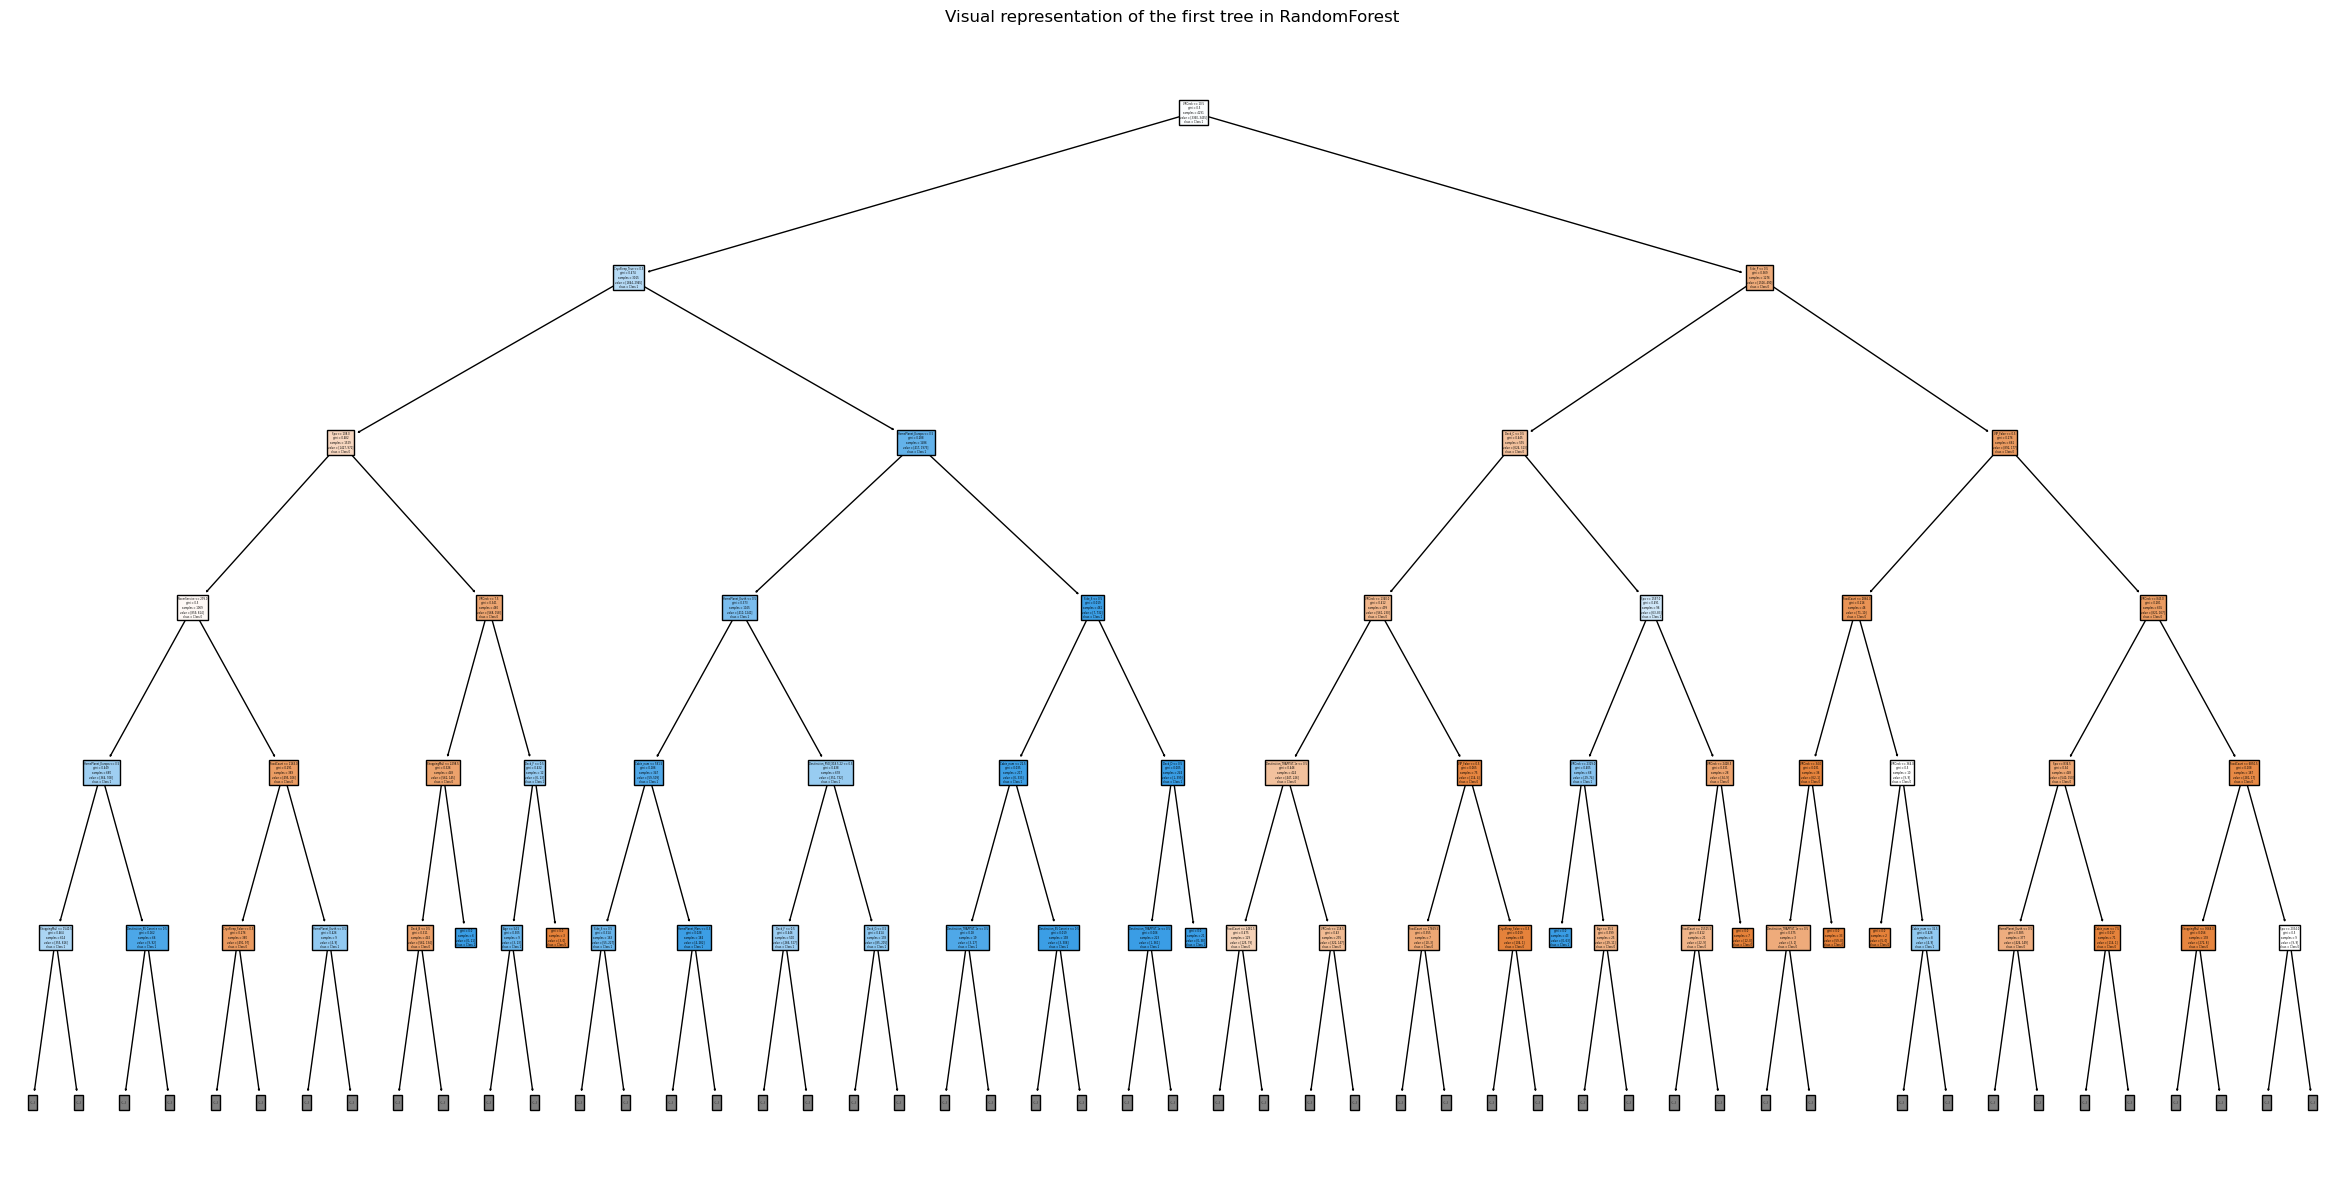

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
#100是树的个数，random_state设置可复现
model.fit(x_train,y_train)
from sklearn.tree import plot_tree

# 可视化第一棵树
plt.figure(figsize=(30, 15))
plot_tree(model.estimators_[0], filled=True, feature_names=list(x_train.columns), class_names=['Class 0', 'Class 1'], max_depth=5)
plt.title('Visual representation of the first tree in RandomForest')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_valid)
acc = accuracy_score(y_valid, y_pred)
print("ACC:", acc)

ACC: 0.8181283107710418


oob数据集和树的个数可视化

In [21]:

# oob_scores = []
# n_estimators_range = range(1, 101, 10)  # 从1到100，步长为10

# for n_estimators in n_estimators_range:
#     model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42, bootstrap=True)
#     #oob_score 设置打开oob，bootstrap指的是自助采样，不使用整个数据集，默认为true，不写也行
#     model.fit(x_train, y_train)
#     oob_scores.append(model.oob_score_)

# # 绘制 OOB 准确度随树数量变化的图表
# plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_range, oob_scores, marker='o')
# plt.xlabel("Number of Trees")
# plt.ylabel("OOB Accuracy")
# plt.title("OOB Accuracy vs Number of Trees")
# plt.show()


为了展示不同特征的重要性，可以采用num_as_root指标。它指的是特征作为树的根节点的数量排序。

In [22]:
test_df = pd.read_csv("test.csv")

submissionid = test_df.PassengerId
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [23]:
test_df = test_df.drop('PassengerId',axis=1, errors='ignore')
test_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [24]:

test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1,errors='ignore')
display(test_df.head(50))

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Cabin_num,Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
5,Earth,False,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,F,7,P
6,Europa,True,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle,B,2,P
7,Europa,True,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,D,0,S
8,Europa,True,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,D,0,S
9,Earth,False,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson,F,7,S


In [25]:
test_df.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Deck            100
Cabin_num       100
Side            100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64

In [26]:
test_df = test_df.drop('Name',axis=1)

In [27]:
test_df['Cabin_num'] = test_df['Cabin_num'].astype('Int64')
#需要注意用int64处理NAN值，不然转换会报错
test_df.info()
test_df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Destination   4185 non-null   object 
 3   Age           4186 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
 10  Deck          4177 non-null   object 
 11  Cabin_num     4177 non-null   Int64  
 12  Side          4177 non-null   object 
dtypes: Int64(1), float64(6), object(6)
memory usage: 438.7+ KB


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S
5,Earth,False,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,F,7,P
6,Europa,True,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,B,2,P
7,Europa,True,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,D,0,S
8,Europa,True,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,D,0,S
9,Earth,False,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,F,7,S


In [28]:
test_df = pd.get_dummies(test_df)
test_df.info()
test_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4186 non-null   float64
 1   RoomService                4195 non-null   float64
 2   FoodCourt                  4171 non-null   float64
 3   ShoppingMall               4179 non-null   float64
 4   Spa                        4176 non-null   float64
 5   VRDeck                     4197 non-null   float64
 6   Cabin_num                  4177 non-null   Int64  
 7   HomePlanet_Earth           4277 non-null   bool   
 8   HomePlanet_Europa          4277 non-null   bool   
 9   HomePlanet_Mars            4277 non-null   bool   
 10  CryoSleep_False            4277 non-null   bool   
 11  CryoSleep_True             4277 non-null   bool   
 12  Destination_55 Cancri e    4277 non-null   bool   
 13  Destination_PSO J318.5-22  4277 non-null   bool 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,27.0,0.0,0.0,0.0,0.0,0.0,3,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,19.0,0.0,9.0,0.0,2823.0,0.0,4,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,31.0,0.0,0.0,0.0,0.0,0.0,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,20.0,10.0,0.0,635.0,0.0,0.0,5,True,False,False,...,False,False,False,False,False,True,False,False,False,True


In [29]:
imputer = IterativeImputer(estimator=DecisionTreeRegressor(random_state=0), random_state=0)
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)
# 显示前 50 行数据
print(test_df.head(50))

# 显示是否还有缺失值
print(test_df.isnull().sum())

     Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Cabin_num  \
0   27.0          0.0        0.0           0.0     0.0     0.0        3.0   
1   19.0          0.0        9.0           0.0  2823.0     0.0        4.0   
2   31.0          0.0        0.0           0.0     0.0     0.0        0.0   
3   38.0          0.0     6652.0           0.0   181.0   585.0        1.0   
4   20.0         10.0        0.0         635.0     0.0     0.0        5.0   
5   31.0          0.0     1615.0         263.0   113.0    60.0        7.0   
6   21.0          0.0        0.0           0.0     0.0     0.0        2.0   
7   20.0          0.0        0.0           0.0     0.0     0.0        0.0   
8   23.0          0.0        0.0           0.0     0.0     0.0        0.0   
9   24.0          0.0      639.0           0.0     0.0     0.0        7.0   
10  19.0        339.0        3.0         136.0   237.0     0.0        9.0   
11  45.0        932.0       74.0           0.0     7.0  1010.0        2.0   

D:\anaconda\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [30]:
y_test = model.predict(test_df)
y_test = y_test.astype(bool)
output = pd.DataFrame({'PassengerId': submissionid,
                       'Transported': y_test.squeeze()})
output.head(50)
# # acc = accuracy_score(y_valid, y_pred)
# # print("ACC:", acc)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


In [31]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['Transported'] = y_test
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
